# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
from os.path import join, isfile
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

%pylab inline

sns.set_palette('hls')
sns.set_context("notebook")

DATA_FOLDER = join('..', '..', 'ADA2017-Tutorials', '02 - Intro to Pandas', 'Data')
DATA_EBOLA = join(DATA_FOLDER, 'ebola')
DATA_TITANIC = DATA_FOLDER

Populating the interactive namespace from numpy and matplotlib


## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

### 1.1 Look at the data 

The reporting method is different in each country. Therefore we have to build different parsers. In our case, we are interested in the **daily average** of new **cases** and **death** per year. The dataset contains a lot of fields that are useless for us and that we will drop.
Note that:

* We assume that death in health workers are part of total new death/cases (e.i. total death number = patient death + health worker death).
* We assurme that if a value is missing, it means that there is no change recorded.

#### 1.1.1 Guinea
Let's first read all csv files and concatenate the datas. We can directly parse the `Date` as a date entry. We fill the missing values (NaN) with 0 since it probably means that no changes were reported. The column `Total` contain the total values for each `Description` (sum of all cities). After parsing we must take a look at the duplicates to see if we have multiple entries for the same tuple (`Date`, `Description`).

In [2]:
# Read all files and concatenate them
guinea_path = join(DATA_EBOLA, 'guinea_data')
guinea_files = [join(guinea_path, f) for f in listdir(guinea_path) if isfile(join(guinea_path, f))]

r=[]
for i in range(len(guinea_files)):
    r.append(pd.read_csv(guinea_files[i], usecols=['Description', 'Totals', 'Date'], 
                         parse_dates=['Date']).fillna(0))
    
r = pd.concat(r)
print('Contains duplicates:', any(r.duplicated(subset=['Date', 'Description'])) )

Contains duplicates: False


Since no duplicates were found we can pivot the table and keep the `Date` as index and `Totals` in `Description` column

In [3]:
r = r.pivot_table(index='Date', columns='Description', values='Totals', aggfunc='max').fillna(0)
r.head()

Description,Cumulative (confirmed + probable + suspects),Fatality rate for confirmed and probables,New admits to CTE so far,New cases of confirmed,New cases of confirmed among health workers,New cases of probables,New cases of suspects,New contacts registered so far,New deaths registered,New deaths registered among health workers,...,Total new cases registered so far,Total number of admissions to CTE,Total number of exits from CTE,Total number of female cases,Total number of hospitalized cases in CTE,Total number of male cases,Total of cured in confirmed cases in CTE,Total of deaths in confirmed cases in CTE,Total samples tested,Total suspected non-class cases
Date,,,,,,,,,,,,,,,,,,,,,
2014-08-04,495,0,0,4,0,0,5,0,0,0,...,9,0,0,277,0,220,89,138,0,0
2014-08-26,661,66%,22,10,0,0,18,137,5,0,...,28,997,6,0,87,0,0,0,1700,518
2014-08-27,663,66%,12,10,0,0,12,127,2,0,...,22,999,14,0,80,0,0,0,1719,518
2014-08-30,707,66%,9,9,0,0,15,21,5,0,...,24,1094,33,0,82,0,0,0,1858,560
2014-08-31,749,65%,26,29,0,8,9,0,3,0,...,46,1113,10,0,99,0,0,0,1941,642


As said above, most of the columns are useless in our case. Let's display the entries to choose the columns that contains meaningfull values.

In [4]:
r.columns

Index(['Cumulative (confirmed + probable + suspects)',
       'Fatality rate for confirmed and probables', 'New admits to CTE so far',
       'New cases of confirmed', 'New cases of confirmed among health workers',
       'New cases of probables', 'New cases of suspects',
       'New contacts registered so far', 'New deaths registered',
       'New deaths registered among health workers',
       'New deaths registered today',
       'New deaths registered today (confirmed)',
       'New deaths registered today (probables)',
       'New deaths registered today (suspects)',
       'Number of confirmed cases among health workers',
       'Number of contacts followed today',
       'Number of contacts followed yesterday',
       'Number of contacts lost to follow up',
       'Number of contacts out of the track 21 days',
       'Number of contacts out of track', 'Number of contacts to follow today',
       'Number of death of confirmed cases among health workers',
       'Number of deaths 

All fields containing the overall (total) cases/death can be dropped as we are interested in new declared cases/death. We will only keep `New cases of confirmed`, `New cases of probables`, `New cases of suspects`, `New deaths registered`, `New deaths registered today (confirmed)`, `New deaths registered today (probables)` and `New deaths registered today (suspects)` since they are more likely to contain meaningfull information for our task.

In [5]:
r[['New cases of confirmed', 'New cases of probables', 'New cases of suspects', 'New deaths registered', 
   'New deaths registered today (confirmed)', 'New deaths registered today (probables)', 
   'New deaths registered today (suspects)']].head()

Description,New cases of confirmed,New cases of probables,New cases of suspects,New deaths registered,New deaths registered today (confirmed),New deaths registered today (probables),New deaths registered today (suspects)
Date,,,,,,,
2014-08-04,4,0,5,0,2,0,0
2014-08-26,10,0,18,5,0,0,0
2014-08-27,10,0,12,2,0,0,0
2014-08-30,9,0,15,5,0,0,0
2014-08-31,29,8,9,3,0,0,0


Note that some of the fields were not properly parsed (type is object instead of int). Therefore we will apply **to_numeric** function to cast them to numbers allowing us to use basic mathematical operation.

We create new fields that will be used to merge all the data (for all the countries). `n_case` contains the new cases, `n_case_un` the probable/suspected cases, `n_death` the new registred deaths and `n_death_un` the deaths suspected/probable

In [6]:
r['n_case'] = pd.to_numeric(r['New cases of confirmed'])
r['n_case_un'] = pd.to_numeric(r['New cases of probables']) + pd.to_numeric(r['New cases of suspects'])
r['n_death'] = pd.to_numeric(r['New deaths registered']) + pd.to_numeric(r['New deaths registered today (confirmed)'])
r['n_death_un'] = pd.to_numeric(r['New deaths registered today (probables)']) + pd.to_numeric(r['New deaths registered today (suspects)'])
r['country'] = ['guinea']*len(r['n_case'])
guinea_res = r[['country', 'n_case', 'n_case_un', 'n_death', 'n_death_un']]
guinea_res.head()

Description,country,n_case,n_case_un,n_death,n_death_un
Date,,,,,
2014-08-04,guinea,4,5,2,0
2014-08-26,guinea,10,18,5,0
2014-08-27,guinea,10,12,2,0
2014-08-30,guinea,9,15,5,0
2014-08-31,guinea,29,17,3,0


#### 1.1.2 Liberia
Almost the same as Guinea data. We directly parse the `Date` as a date entry. We fill the missing values with 0 since it probably means that no changes were reported. The column `National` contain the total values for each `Variable` (sum of all cities). After parsing we take a look at the duplicates to see if we have multiple entries for the same tuple (`Date`, `Variable`).

In [7]:
# Read all files and concatenate them
liberia_path = join(DATA_EBOLA, 'liberia_data')
liberia_files = [join(liberia_path, f) for f in listdir(liberia_path) if isfile(join(liberia_path, f))]

r_l=[]
for i in range(len(liberia_files)): 
    r_l.append(pd.read_csv(liberia_files[i], usecols=['Date', 'Variable', 'National'], 
                         parse_dates=['Date']).fillna(0))
    
r_l = pd.concat(r_l)
print('Contains duplicates:', any(r_l.duplicated(subset=['Date', 'Variable'])))

Contains duplicates: True


The data contain duplicates. We need to handle them. Let's take a look at the duplicates.

In [8]:
r_l[r_l.duplicated(subset=['Date', 'Variable'])]

,Date,Variable,National
31,2014-10-04,Cumulative (confirmed + probable + suspected),3929.0
32,2014-10-04,Cumulative cases among HCW,192.0
33,2014-10-04,Cumulative deaths among HCW,94.0
34,2014-10-04,Total death/s in confirmed cases,1018.0
35,2014-10-04,Total death/s in probable cases,701.0
36,2014-10-04,Total death/s in suspected cases,491.0
37,2014-10-04,"Total death/s in confirmed, probable, suspecte...",2210.0


We can see that those fields are not very relevant for our task. Therefore we can either drop them or merge them. We chose to merge them, using max function (for each duplicated variable we keep one with the higher value), to avoid losing data. Then we can pivot the table as we did for the Guinea data.

In [9]:
r_l = r_l.pivot_table(index='Date', columns='Variable', values='National', aggfunc=max).fillna(0)
r_l.head()

Variable,Case Fatality Rate (CFR) - Confirmed & Probable Cases,Case Fatality Rate (CFR) - Confirmed & Probable Cases,Contacts lost to follow-up,Contacts seen,Contacts who completed 21 day follow-up,Contacts who completed 21 day follow-up,Cumulative (confirmed + probable + suspected),Cumulative (confirmed + probable + suspects),Cumulative CFR,Cumulative admission/isolation,...,"Total death/s in confirmed, probable, suspected cases","Total death/s in confirmed, probable, suspected cases",Total death/s in probable cases,Total death/s in suspected cases,Total discharges,Total no. currently in Treatment Units,Total no. currently in Treatment Units,Total probable cases,Total specimens tested,Total suspected cases
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-16,0.0,0.0,0.0,95.0,0.0,11.0,0.0,0.0,0.0,5.0,...,0.0,16.0,6.0,2.0,3.0,0.0,5.0,6.0,28.0,4.0
2014-06-17,0.0,0.0,0.0,90.0,0.0,11.0,0.0,0.0,0.0,10.0,...,0.0,16.0,6.0,2.0,0.0,0.0,10.0,6.0,34.0,8.0
2014-06-22,0.0,25.0,0.0,232.0,0.0,17.0,0.0,0.0,0.0,15.0,...,0.0,25.0,8.0,1.0,0.0,0.0,15.0,8.0,49.0,6.0
2014-06-24,0.0,0.0,15.0,224.0,0.0,17.0,0.0,0.0,0.0,25.0,...,0.0,32.0,8.0,6.0,0.0,0.0,25.0,8.0,63.0,13.0
2014-06-25,0.0,0.0,15.0,112.0,0.0,17.0,0.0,0.0,0.0,25.0,...,0.0,37.0,8.0,9.0,0.0,0.0,25.0,9.0,4.0,17.0


Most of the column are useless in our case. Let's display the entries to choose the columns that contains meaningfull values.

In [10]:
r_l.columns

Index(['Case Fatality Rate (CFR) - \n Confirmed & Probable Cases',
       'Case Fatality Rate (CFR) - Confirmed & Probable Cases',
       'Contacts lost to follow-up', 'Contacts seen',
       'Contacts who completed 21 day \n follow-up',
       'Contacts who completed 21 day follow-up',
       'Cumulative (confirmed + probable + suspected)',
       'Cumulative (confirmed + probable + suspects)', 'Cumulative CFR',
       'Cumulative admission/isolation', 'Cumulative cases among HCW',
       'Cumulative confirmed, probable and suspected cases',
       'Cumulative deaths among HCW', 'Currently under follow-up',
       'New Case/s (Probable)', 'New Case/s (Suspected)', 'New admissions',
       'New case/s (confirmed)', 'Newly Reported Cases in HCW',
       'Newly Reported deaths in HCW', 'Newly reported contacts',
       'Newly reported deaths', 'Specimens collected',
       'Specimens pending for testing', 'Total Case/s (Probable)',
       'Total Case/s (Suspected)',
       'Total Number 

Same as before, all fields containing the overall (total) cases/death will be dropped. We will only keep `'New Case/s (Probable)`, `New Case/s (Suspected)`, `New case/s (confirmed)` and `Newly reported deaths)`.

In [11]:
r_l[['New Case/s (Probable)', 'New Case/s (Suspected)', 'New case/s (confirmed)', 'Newly reported deaths']].head()

Variable,New Case/s (Probable),New Case/s (Suspected),New case/s (confirmed),Newly reported deaths
Date,,,,
2014-06-16,1.0,2.0,1.0,2.0
2014-06-17,0.0,2.0,0.0,0.0
2014-06-22,0.0,5.0,5.0,4.0
2014-06-24,0.0,2.0,4.0,4.0
2014-06-25,1.0,4.0,2.0,3.0


We create the same fields as for Guinea to match the data schema that we choosed.

In [12]:
r_l['n_case'] = r_l['New case/s (confirmed)']
r_l['n_case_un'] = r_l['New Case/s (Suspected)'] + r_l['New Case/s (Probable)']
r_l['n_death'] = r_l['Newly reported deaths']
r_l['country'] = ['liberia']*len(r_l['n_case'])
liberia_res = r_l[['country', 'n_case', 'n_case_un', 'n_death']]
liberia_res.head()

Variable,country,n_case,n_case_un,n_death
Date,,,,
2014-06-16,liberia,1.0,3.0,2.0
2014-06-17,liberia,0.0,2.0,0.0
2014-06-22,liberia,5.0,5.0,4.0
2014-06-24,liberia,4.0,2.0,4.0
2014-06-25,liberia,2.0,5.0,3.0


#### 1.1.3 Sierra Leone
Same logic as before. We directly parse the `date` as a date entry. We fill the missing values with 0 since it probably means that no changes were reported. The column `National` contain the total values for each description (sum of all cities). After parsing we take a look at the duplicates to see if we have multiple entries for the same tuple (`date`, `variable`).

In [13]:
# Read all files and concatenate them
sl_path = join(DATA_EBOLA, 'sl_data')
sl_files = [join(sl_path, f) for f in listdir(sl_path) if isfile(join(sl_path, f))]

r_sl=[]
for i in range(len(sl_files)): 
    r_sl.append(pd.read_csv(sl_files[i], usecols=['date', 'variable', 'National'], 
                         parse_dates=['date']).fillna(0))
    
r_sl = pd.concat(r_sl)
print('Contains duplicates:', any(r_sl.duplicated(subset=['date', 'variable'])))

Contains duplicates: True


The data contain duplicates, so let's look at the duplicates

In [14]:
r_sl[r_sl.duplicated(subset=['date', 'variable'])]

,date,variable,National
37,2014-11-10,pending,0
38,2014-11-10,positive_corpse,0
39,2014-11-10,negative_corpse,0


Same as seen before, those fields are not relevant to our task. Therefore we can either drop them or merge them as we already did for the previous data. We also choose to merge them using max function to avoid data loss. Then we use the same method as before to pivot the table.

In [15]:
r_sl = r_sl.pivot_table(index='date', columns='variable', values='National', aggfunc=max).fillna(0)
r_sl.head()

variable,cfr,contacts_followed,contacts_healthy,contacts_ill,contacts_not_seen,cum_completed_contacts,cum_confirmed,cum_contacts,cum_noncase,cum_probable,...,new_positive,new_probable,new_samples,new_suspected,pending,percent_seen,population,positive_corpse,repeat_samples,total_lab_samples
date,,,,,,,,,,,,,,,,,,,,,
2014-08-12,36.8,2255,1937,14,131,901,717,2838,657,37,...,0,1,0,10,0,87%,6348350,0,0,0
2014-08-13,37.2,0,1956,14,131,0,733,2099,680,38,...,0,1,0,3,0,94%,"6,348,350",0,0,0
2014-08-14,37.5,2268,2135,7,117,1852,747,4173,708,39,...,0,2,0,0,0,94%,"6,348,350",0,0,0
2014-08-15,37.9,2212,2137,7,95,1927,757,4280,726,37,...,0,1,0,6,0,97%,"6,348,350",0,0,0
2014-08-16,38.3,2323,2265,6,79,2021,775,4361,741,34,...,0,0,0,3,0,98%,"6,348,350",0,0,0


Most of the column are useless in our case. Let's display the entries to choose the columns that contains meaningfull values.

In [16]:
r_sl.columns

Index(['cfr', 'contacts_followed', 'contacts_healthy', 'contacts_ill',
       'contacts_not_seen', 'cum_completed_contacts', 'cum_confirmed',
       'cum_contacts', 'cum_noncase', 'cum_probable', 'cum_suspected',
       'death_confirmed', 'death_probable', 'death_suspected',
       'etc_cum_admission', 'etc_cum_deaths', 'etc_cum_discharges',
       'etc_currently_admitted', 'etc_new_admission', 'etc_new_deaths',
       'etc_new_discharges', 'negative_corpse', 'new_completed_contacts',
       'new_confirmed', 'new_contacts', 'new_negative', 'new_noncase',
       'new_positive', 'new_probable', 'new_samples', 'new_suspected',
       'pending', 'percent_seen', 'population', 'positive_corpse',
       'repeat_samples', 'total_lab_samples'],
      dtype='object', name='variable')

All fields containing the overall (cumulative) of cases/death will be dropped. We will only keep `'new_confirmed`, `new_probable`, `new_suspected` and `death_confirmed` since they are more likely to contain the information we want.

Note that `death_confirmed` migth contain the overall value of death. Let's take a look at it.

In [17]:
r_sl[['new_confirmed', 'new_probable', 'new_suspected', 'death_confirmed']].head(16)

variable,new_confirmed,new_probable,new_suspected,death_confirmed
date,,,,
2014-08-12,11,1,10,264
2014-08-13,15,1,3,273
2014-08-14,13,2,0,280
2014-08-15,10,1,6,287
2014-08-16,18,0,3,297
2014-08-17,2,0,1,305
2014-08-18,5,15,40,312
2014-08-19,9,3,16,320
2014-08-20,4,0,1,322


Indeed, `death_confirmed` contains the overall number of death. Moreover we can see that some fields are filled with 0. We assumed that it means that data were probably missing. Let's take a deeper look at those data with missing entries

In [18]:
r_sl.loc[r_sl['death_confirmed']==0, ['new_confirmed', 'new_probable', 'new_suspected', 'death_confirmed']]

variable,new_confirmed,new_probable,new_suspected,death_confirmed
date,,,,
2014-08-26,0,0,0,0
2014-08-29,0,0,0,0
2014-09-05,0,0,0,0
2014-09-12,0,0,0,0
2014-11-14,0,0,0,0
2014-11-19,0,0,0,0
2014-12-13,0,0,0,0


Since all fields are empty we can drop thoses entries. Afterward we can estimate the number of new death as the difference of total registred deaths between two days. Note that for day 1 (first entry in the table) we will not be able to estimate the amount of new deaths. Therefore we chose it as our starting point and set its value to 0.

In [19]:
r_sl.drop(r_sl.loc[r_sl['death_confirmed']==0].index, inplace=True)
r_sl['new_death'] = pd.to_numeric(r_sl['death_confirmed']).diff().fillna(0)

Finally, we create the new fields to match the data schema that we choosed.

In [20]:
r_sl['n_case'] = pd.to_numeric(r_sl['new_confirmed'])
r_sl['n_case_un'] = pd.to_numeric(r_sl['new_probable'] + r_sl['new_suspected'])
r_sl['n_death'] = pd.to_numeric(r_sl['new_death'])
r_sl['country'] = ['sl']*len(r_sl['n_case'])
sl_res = r_sl[['country', 'n_case', 'n_case_un', 'n_death']]
sl_res.head()

variable,country,n_case,n_case_un,n_death
date,,,,
2014-08-12,sl,11.0,110.0,0.0
2014-08-13,sl,15.0,13.0,9.0
2014-08-14,sl,13.0,20.0,7.0
2014-08-15,sl,10.0,16.0,7.0
2014-08-16,sl,18.0,3.0,10.0


### 1.2 Results


Now that all data have the same structure we can concatenate them

In [21]:
r = pd.concat([guinea_res, liberia_res, sl_res]).fillna(0)

We can also look at the evolution of number of cases and death for each country.

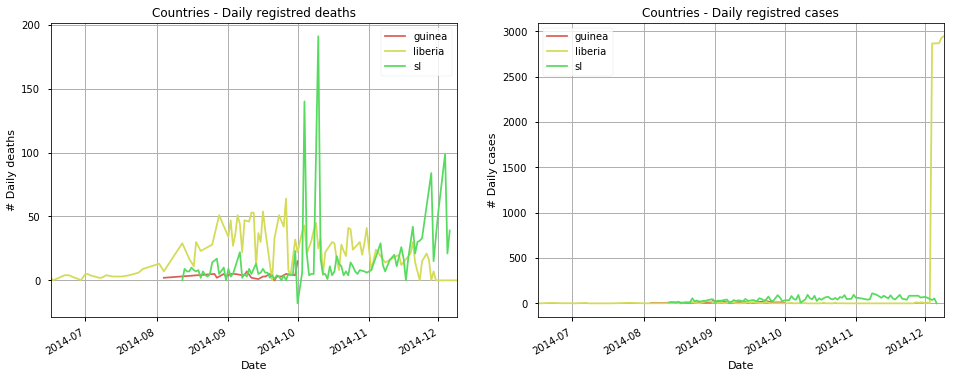

In [22]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16,6))
for label, df in r.groupby('country'):
    df.plot(y='n_death', ax=ax, label=label)
for label, df in r.groupby('country'):
    df.plot(y='n_case', ax=ax2, label=label)
ax.grid(); ax2.grid()
ax.set_xlabel('Date'); ax2.set_xlabel('Date')
ax.set_ylabel('# Daily deaths'); ax2.set_ylabel('# Daily cases')
ax.set_title('Countries - Daily registred deaths'); ax2.set_title('Countries - Daily registred cases')
plt.legend()

#### 1.2.1. Negative number of death
Note that for Sierra Leon (sl), there is a number of registred death negative around early october. This is, of course, not due to the fact that people resuscitated. Below is a more detailed view of the problem

In [23]:
r_sl.iloc[40:50][['death_confirmed', 'new_death']]

variable,death_confirmed,new_death
date,,
2014-09-26,513,0.0
2014-09-27,518,5.0
2014-09-28,522,4.0
2014-09-29,527,5.0
2014-09-30,550,23.0
2014-10-01,532,-18.0
2014-10-03,538,6.0
2014-10-04,678,140.0
2014-10-05,699,21.0


The problem appears between the 2014-09-30 and 2014-10-01 where the number of death decreased. The problem seems to be a typo (550 typed instead of 530) or a wrong estimation of number of death in a specific city. In both case we are not able to determine the real value of this field so we drop 2014-09-30 (no changes) and put 2014-10-01 to **5** (532-527) to be consistant with data.

In [24]:
r = r.loc[np.logical_or(r['country']!='sl', r.index != '2014-09-30')]
r.loc[r['n_death'] < 0, 'n_death'] = 5
r[r['country']=='sl'].loc['2014-09-28':'2014-10-04']

,country,n_case,n_case_un,n_death,n_death_un
2014-09-28,sl,90.0,19.0,4.0,0.0
2014-09-29,sl,65.0,25.0,5.0,0.0
2014-10-01,sl,33.0,10.0,5.0,0.0
2014-10-03,sl,35.0,13.0,6.0,0.0
2014-10-04,sl,81.0,22.0,140.0,0.0


#### 1.2.2. Liberia sudden cases peak
We can also see a huge peak at the end for the Liberia. it could be a sudden increase of registred cases but there is no correlation with the number of death.

In [25]:
r_l.loc['2014-12-01':'2014-12-09'][['Total probable cases', 'New Case/s (Probable)',  
                                    'Total suspected cases', 'New Case/s (Suspected)', 
                                    'Total confirmed cases', 'New case/s (confirmed)', 'Newly reported deaths']]

Variable,Total probable cases,New Case/s (Probable),Total suspected cases,New Case/s (Suspected),Total confirmed cases,New case/s (confirmed),Newly reported deaths
Date,,,,,,,
2014-12-01,1793.0,9.0,3059.0,25.0,2823.0,1.0,0.0
2014-12-02,1809.0,10.0,3057.0,18.0,2824.0,9.0,0.0
2014-12-03,1814.0,0.0,3075.0,0.0,2830.0,0.0,0.0
2014-12-04,0.0,1800.0,0.0,3054.0,0.0,2867.0,0.0
2014-12-05,0.0,1808.0,0.0,3056.0,0.0,2867.0,0.0
2014-12-06,0.0,1810.0,0.0,3056.0,0.0,2869.0,0.0
2014-12-07,0.0,1829.0,0.0,3067.0,0.0,2869.0,0.0
2014-12-08,0.0,1805.0,0.0,3054.0,0.0,2927.0,0.0
2014-12-09,0.0,1801.0,0.0,3050.0,0.0,2946.0,0.0


As we can see, it seems that there has been an error when the data was reported, like if the information had been put in a wrong column with a shift to the right starting in 2014-12-04 entry. By looking closely we see also that the numbers are oddly inferior to what has been reported before which should not be the case as the number should report a cumulative number, hence be superior. For those reasons, we decided to drop those last six entry.

In [26]:
r.drop(r.loc[np.logical_and(r.index >= '2014-12-04', r['country']=='liberia')].index, inplace=True)

#### 1.2.3. Final plot and results (cleared)

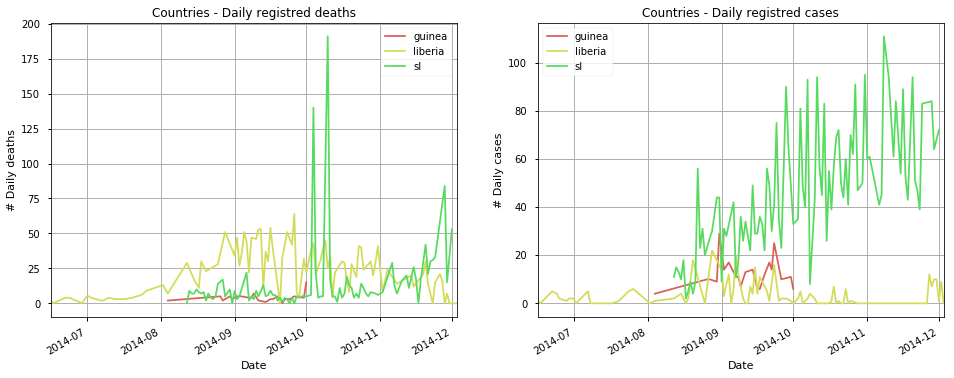

In [27]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16,6))
for label, df in r.groupby('country'):
    df.plot(y='n_death', ax=ax, label=label)
for label, df in r.groupby('country'):
    df.plot(y='n_case', ax=ax2, label=label)
ax.grid(); ax2.grid()
ax.set_xlabel('Date'); ax2.set_xlabel('Date')
ax.set_ylabel('# Daily deaths'); ax2.set_ylabel('# Daily cases')
ax.set_title('Countries - Daily registred deaths'); ax2.set_title('Countries - Daily registred cases')
plt.legend()


We can finally compute the number of death and new cases. We add in the table the `n_case_tot` and `n_death_tot` that take into account the probable cases/deaths. Each column is expressed as the **daily average** case/death **per year**

We can see on the next table that the average number of death per day (`n_death`) is more important in Liberia and Sierra Leone. If we consider the probable cases `n_case_tot`, there are more cases of ebola in Sierra Leone.

In [28]:
r['n_case_tot'] = r['n_case'] +  r['n_case_un']
r['n_death_tot'] = r['n_death'] +  r['n_death_un']

COUNTRIES = ['guinea', 'liberia', 'sl']
ds = [(r[r['country']==COUNTRY].index[-1]-r[r['country']==COUNTRY].index[0]).days for COUNTRY in COUNTRIES]
print('Days spans: {}'.format(ds))
r.groupby('country').sum().divide(ds, axis=0)

Days spans: [58, 170, 111]


,n_case,n_case_un,n_death,n_death_un,n_case_tot,n_death_tot
country,,,,,,
guinea,4.758621,3.465517,1.534483,0.0,8.224138,1.534483
liberia,1.852941,19.376471,11.988235,0.0,21.229412,11.988235
sl,38.405405,31.981982,11.576577,0.0,70.387387,11.576577


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

### 2.1 Load data
We load all the data. First we just concatenate them. The first 9 files (`MID1` to `MID9`). The last file (`metadata`) is used to set the column names. We display the head of the data frame. 

Note that we add `src` value to be able to remember which file the entry belongs to.

In [29]:
microbiome_path = join(DATA_FOLDER, 'microbiome')

# Read 9 first speadsheets and concatenate them
microbiome_files = [join(microbiome_path, f) for f in listdir(microbiome_path) if isfile(join(microbiome_path, f))]
microbiome_files.sort()

#Save and remove the metadata path
metadata = microbiome_files[-1]
microbiome_files.pop();

In [30]:
arr=[]
for i in range(len(microbiome_files)):
    df_temp = pd.read_excel(microbiome_files[i], header=None, names=['Name', 'Number'])
    df_temp['src'] = i
    arr.append(df_temp)

arr = pd.concat(arr)
arr.head()

,Name,Number,src
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,0
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,0
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,0
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,0
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,0


We can also take a look at the `metadata` file. There are 3 different values `BARCODE`, `GROUP`, `SAMPLE`.

In [31]:
col_header = pd.read_excel(metadata)
col_header

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,NaN
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue
5,MID6,NEC 1,stool
6,MID7,Control 1,stool
7,MID8,NEC 2,stool
8,MID9,Control 2,stool


### 2.2 Merging data
Before merging data, we need to check if the entries ae unique, i.e. if there is no duplicates for the tuple (`Name`, `src`). Duplicates will means that there is at least two rows in the same files that have similar `Name` value.

However in our case there is no duplicates. Therefore we can build our table setting `src` as the columns, `Name` as index and `Number` as the value. The missing values are automatically set to NaN.

In [32]:
print('Number of duplicates: {}'.format(np.sum(arr.duplicated(subset=['Name', 'src']))))

Number of duplicates: 0


In [33]:
arr_merged = arr.pivot(index='Name', columns='src', values='Number')
arr_merged.head()

src,0,1,2,3,4,5,6,7,8
Name,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0,15.0,NaN,26.0,NaN,1.0,NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0,14.0,2.0,28.0,7.0,8.0,NaN,16.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0,4.0,NaN,5.0,1.0,2.0,NaN,2.0


Now that our table is build we can rename the columns according to the `metadata` file. We can create a Multiindex (index on muliple level) and populate it with the entries of the `metadata` file. We can set our new indeces to the columns and visualize them.

Note that the `Name` entry becomes the nex index for the table

In [34]:
t = col_header[['BARCODE', 'GROUP', 'SAMPLE']].fillna('unknown').values.T
index_new = pd.MultiIndex.from_tuples(list(zip(*t)), names=['BARCODE', 'GROUP', 'SAMPLE'])

In [35]:
arr_merged.columns = index_new
arr_merged.fillna('unknown', inplace=True)
arr_merged.head()

BARCODE,MID1,MID2,MID3,MID4,MID5,MID6,MID7,MID8,MID9
GROUP,EXTRACTION CONTROL,NEC 1,Control 1,NEC 2,Control 2,NEC 1,Control 1,NEC 2,Control 2
SAMPLE,unknown,tissue,tissue,tissue,tissue,stool,stool,stool,stool
Name,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",unknown,2,1,unknown,5,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",unknown,14,15,unknown,26,unknown,1,unknown,1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23,14,2,28,7,8,unknown,16
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",unknown,unknown,unknown,unknown,1,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",unknown,1,4,unknown,5,1,2,unknown,2


Finally we check one last time is the index is unique

In [36]:
print('Is index unique: {}'.format(arr_merged.index.is_unique))

Is index unique: True


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [37]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

### 3.1 Read data

In [38]:
df = pd.read_excel(join(DATA_TITANIC, 'titanic.xls'),  
                   converters={'pclass': np.int, 'survived': np.int, 'age': np.float})
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


As a first glance, we can use the html file to have the type and range for some attributes. Some attributes will need further investigations. Let's have a look at how the data is organized column by column : 
* `pclass`: Numerical value of type int64 at first, this field can take 1,2,3 as value. As it has only 3 fixed value, it can be categorical. <br>
We check it contains indeed only 3 values (1,2,3). Then we set it as categorial.

In [39]:
print('Type of data: {}'.format(df['pclass'].dtype))
print('Unique categories: {}'.format(df['pclass'].unique()))
df['pclass'] = df.pclass.astype('category', ordered=True)
df['pclass'].cat.categories

Type of data: int64
Unique categories: [1 2 3]


Int64Index([1, 2, 3], dtype='int64')

* `survived`: Binary class, hence numerical value that will be 0 or 1. Type in64.It could be set as categorical. Actually we decided to keep it as numerical to simplify the way to plot survival ratio. <br>
We check it contains indeed only 2 values (0, 1)

In [40]:
print('Type of data: {}'.format(df['survived'].dtype))
print('Unique categories: {}'.format(df['survived'].unique()))

Type of data: int64
Unique categories: [1 0]


* `name`: Passenger name. Simple string value but stored as an object type. Not categorical. Many possiblities.

In [41]:
print('Type of data: {}'.format(df['name'].dtype))
print('Unique categories: {}'.format(df['name'].unique()))

Type of data: object
Unique categories: ['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ..., 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']


* `sex`: String corresponding to sex of the person with two possibility : female or male. Stored as an object type Can be categorical. <br>
We check if it contains indeed only two possibility before setting it as a categorical

In [42]:
print('Type of data: {}'.format(df['sex'].dtype))
print('Unique categories: {}'.format(df['sex'].unique()))
df['sex'] = df.sex.astype('category', ordered=True)
df['sex'].cat.categories

Type of data: object
Unique categories: ['female' 'male']


Index(['female', 'male'], dtype='object')

* `age`: Numerical float64 indicating age of the passenger, It should be a positive number and not too high or NaN. We have 263 personne with no registered age and an age value in range [0.1667, 80]. There are a lot of passengers that do not have age entries. We will let them set as NaN and discard them for plotting. Not categorical.

Note that we were sceptical when we saw that the minimum age was 0.1667 since it is not an integer. But as you can see (in the next paragraph) all the values between 0 and 1 are actually the age of the baby in month.

In [43]:
print('Type of data: {}'.format(df['age'].dtype))
print('Amount of NaN: {}, max: {}, min: {}'.format(
    np.sum(pd.isnull(df['age'])), df['age'].max(), df['age'].min()))
print('Baby age in range 0-1 : {} month/s'.format( 
    np.round(pd.to_numeric(df[df['age'] < 1]['age'].values*12), decimals=1) ))
df.age = pd.to_numeric(df.age)

Type of data: object
Amount of NaN: 263, max: 80.0, min: 0.1667
Baby age in range 0-1 : [ 11.  10.   8.  10.  11.  10.   9.   9.   4.   2.   9.   5.] month/s


* `sibsp`: Familly related field (number of siblings and/or spouse on boat). Stored as int64 type and range in [0,8] Not categorical.

In [44]:
print('Type of data: {}'.format(df['sibsp'].dtype))
print('Amount of NaN: {}, max: {}, min: {}'.format(
    np.sum(pd.isnull(df['sibsp'])), df['sibsp'].max(), df['sibsp'].min()))

Type of data: int64
Amount of NaN: 0, max: 8, min: 0


* `parch`: Family related field (number of parents and/or children on boat). Stored as int64 and range in [0,9]. Not categorical

In [45]:
print('Type of data: {}'.format(df['parch'].dtype))
print('Amount of NaN: {}, max: {}, min: {}'.format(
    np.sum(pd.isnull(df['parch'])), df['parch'].max(), df['parch'].min()))

Type of data: int64
Amount of NaN: 0, max: 9, min: 0


* `ticket`: String value indicating id of the ticket. Contain letters and numbers and has many possibilities, stored as an object type. Not categorical.

In [46]:
print('Type of data: {}'.format(df['ticket'].dtype))
print('Ticket id possibilities: {}'.format(df['ticket'].value_counts()))

Type of data: object
Ticket id possibilities: CA. 2343              11
CA 2144                8
1601                   8
S.O.C. 14879           7
347082                 7
PC 17608               7
3101295                7
347077                 7
19950                  6
347088                 6
113781                 6
382652                 6
W./C. 6608             5
220845                 5
349909                 5
PC 17757               5
113503                 5
4133                   5
PC 17483               4
PC 17760               4
LINE                   4
16966                  4
113760                 4
230136                 4
SC/Paris 2123          4
C.A. 34651             4
12749                  4
PC 17755               4
17421                  4
C.A. 2315              4
                      ..
SOTON/O.Q. 3101314     1
349249                 1
113043                 1
13213                  1
376563                 1
STON/O 2. 3101288      1
4137                   1
3703

* `fare`: Numerical value, float64, indicating ticket fare, expressed in British pound. Range 0 to 512.3292. Not categorical.

In [47]:
print('Type of data: {}'.format(df['fare'].dtype))
print('Amount of NaN: {}, max: {}, min: {}'.format(
    np.sum(pd.isnull(df['fare'])), df['fare'].max(), df['fare'].min()))

Type of data: float64
Amount of NaN: 1, max: 512.3292, min: 0.0


* `cabin`: String that contains the cabin number and the floor, stored as an object. Take many possiblities
    * `floor`: Letter indicate the floor number. We will set it as categorical

In [48]:
print('Type of data: {}'.format(df['cabin'].dtype))

Type of data: object


Here we can split the field and isolate the floor letter. To do so we use regex. Since some fields contains multiple letters we only keep the first one as the are the same. ex: `B58 B60` -> `BB` -> `B`. Note that `a` is not a floor but what is left of `nan`, so thoses are missing values. We set them to NaN.

Note that ther is some specific cases were our algorithm will fail. In the cases where floor is `FE` or `FG` what should we do ? Take `F` or `E/G` as floor letter. If you refere to [Mr Olaus Jørgensen Abelseth](https://www.encyclopedia-titanica.org/titanic-survivor/olaus-jorgensen-abelseth.html) profile (one of the passenger), you will see that the cabin number is expressed as `[F] G63`. Therefore we assume the second letter to be the floor value.

In [49]:
floors = [re.sub(r'[0-9 ]', '', str(item)) for item in df['cabin']]  # Extract only letters
print('Floors (unique): {}, unknowm: {}'.format(np.unique(floors), df['cabin'].isnull().sum()))

Floors (unique): ['A' 'B' 'BB' 'BBB' 'BBBB' 'C' 'CC' 'CCC' 'D' 'DD' 'E' 'EE' 'F' 'FE' 'FG'
 'G' 'T' 'nan'], unknowm: 1014


In [50]:
floors = [item[0] if len(item) == 1 or item[0]==item[1] else item[1] for item in floors]
df['floor'] = floors
df.loc[df['floor'] == 'a', 'floor'] = np.NaN
df['floor'] = df.floor.astype('category', ordered=True)
df['floor'].cat.categories

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype='object')

* `embarked`: String stored as an object type, indicating embarcation location with 3 possible values : Cherbourg (C), Queenstown (Q), Southampton (S). Categorical <br>
We check if it contains only three values Cherbourg (C), Queenstown (Q), Southampton (S). However we can see that it contains also unknown values (nan). As you see there are only 2 values that containt NaN. Therefore we will let them set to NaN and not include them in `embarked` plots


In [51]:
print('Type of data: {}'.format(df['embarked'].dtype))
print('Unique categories: {}, unknown: {}'.format(df['embarked'].unique(), df['embarked'].isnull().sum()))
df['embarked'] = df['embarked']
df['embarked'] = df.embarked.astype('category', ordered=True)
df['embarked'].cat.categories

Type of data: object
Unique categories: ['S' 'C' nan 'Q'], unknown: 2


Index(['C', 'Q', 'S'], dtype='object')

* `boat`: String stored as an object type that indicates the rescue boat id (not sure about this one). Many possible outcomes, not categorical

In [52]:
print('Type of data: {}'.format(df['boat'].dtype))
print('Boat id possibilities: \n{}'.format(df['boat'].value_counts()))

Type of data: object
Boat id possibilities: 
13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
11         25
9          25
7          23
16         23
8          23
6          20
D          20
12         19
2          12
A          11
B           9
1           5
5 7         2
13 15       2
C D         2
15 16       1
13 15 B     1
8 10        1
5 9         1
2           1
Name: boat, dtype: int64


* `body`: Numerical value that indicates the body id number, type float64 in range [1,328]. Many NaN. Not categorical

In [53]:
print('Type of data: {}'.format(df['body'].dtype))
print('Amount of NaN: {}, max: {}, min: {}'.format(
    np.sum(pd.isnull(df['body'])), df['body'].max(), df['body'].min()))

Type of data: float64
Amount of NaN: 1188, max: 328.0, min: 1.0


* `home.dest`: String indicating the home and final destination of the passenger, stored as a object type. Many possible outcomes. Not categorical

In [54]:
print('Type of data: {}'.format(df['home.dest'].dtype))

Type of data: object


Note : If ranges was no specified it means that the values can either be a string (no limit) either be a mix between numbers and strings (`cabin` or `boat` for example).

### 3.2 Histogram data
We plot the repartition of the passenger as a function of `pclass`, `sex`, `embarked` and `age`. Note that, as said before, NaN values are not taken into account hence are not part of the results since they do not represent usefull data.

Note that we split the `age` data into subsets (age ranges of 10 years) as asked for histogram plotting.

In [55]:
def nice_bar_plot(data, ax, title='', y_axis=''):
    ax.set_title(title , fontsize=12, fontweight='bold')
    ax.set_xlabel(data.name); ax.set_ylabel(y_axis)
    sns.barplot(x=data.value_counts().keys(), y=data.value_counts().values,  ax=ax)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

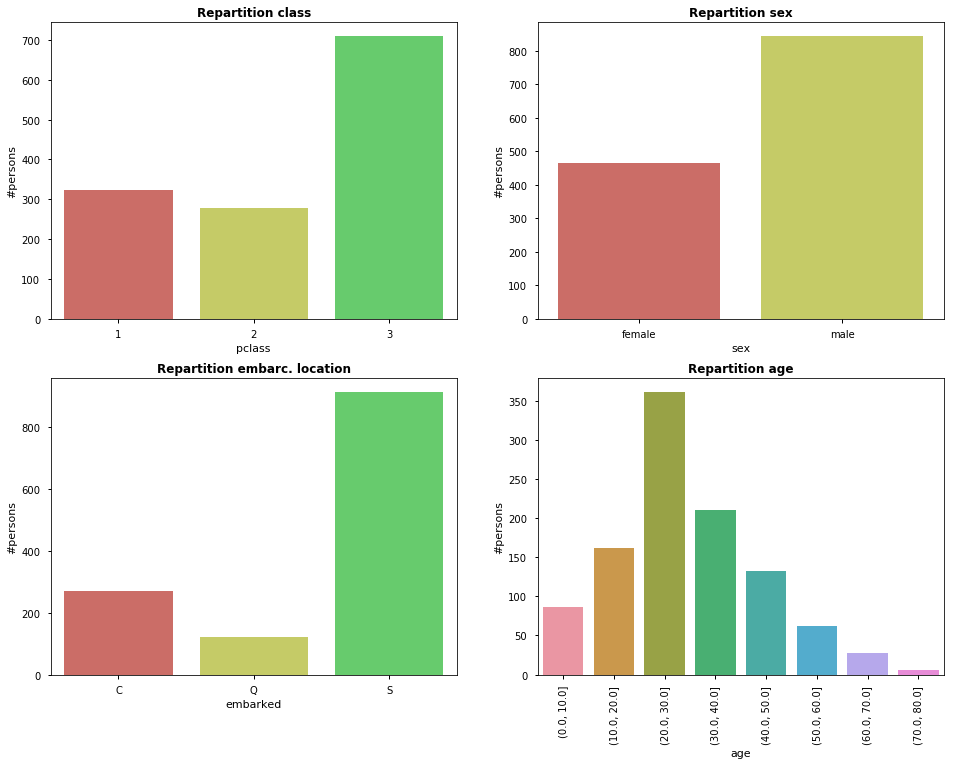

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

nice_bar_plot(df['pclass'], axes[0, 0], 'Repartition class', '#persons')
nice_bar_plot(df['sex'], axes[0, 1], 'Repartition sex', '#persons')
nice_bar_plot(df['embarked'], axes[1, 0], 'Repartition embarc. location', '#persons')
age_cut = pd.cut(df.age, [0, 10, 20, 30, 40, 50, 60, 70, df['age'].max() ])
nice_bar_plot(age_cut, axes[1, 1], 'Repartition age', '#persons')

### 3.3 Proportion of passengers by cabin floor

We calculate and plot in a pie chart the proportion of passengers by cabin floor. We use the variable `floor` that we computed in part 1 to do so. 

It is important to take into account the fact that there is a lot of NaN entry and we only have the value for 295 passengers, which is not so representative from the total number of passengers (1309) in the dataset. Hence, from the observable datas, we can say that approximately 1/3 of the passengers where on C floor. We found it odd to have people located on T floor, as it seems to be the floor where the motors and turbine where located.

In [57]:
def calc_proportion(data):
    proportion = (data.value_counts().divide(data.value_counts().sum())*100)
    return proportion

print('Total of passengers that have a valid entry of floor : {}'.format(df['floor'].value_counts().sum() ))
print('Repartition by floor : \n{}'.format(calc_proportion(df['floor'])))

Total of passengers that have a valid entry of floor : 295
Repartition by floor : 
C    31.864407
B    22.033898
D    15.593220
E    14.915254
A     7.457627
F     4.745763
G     3.050847
T     0.338983
Name: floor, dtype: float64


In [58]:
sns.set_palette('hls', 10)
def nice_pie_plot(data, ax, title=''):
    ax.set_title(title , fontsize=12, fontweight='bold')
    ax.set_xlabel(data.name)
    ax.pie(data.value_counts().values, labels=data.value_counts().keys(), autopct='%1.1f%%')

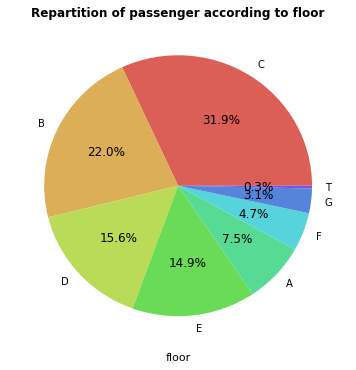

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
nice_pie_plot(df['floor'], ax, 'Repartition of passenger according to floor')

### 3.4 Proportion of survivors by travel class

Below we compute the proportion and plot it in pie charts where 1 means that the person survived and 0 means that the person died.
Here we can say that the results are relevant as there is an entry for every of the 1309 passengers listed in our dataset. We observe that there is a much higher chance of survival in first class, 61,92% whereas it drops to 42.96% in second class and is even lower in third class at 25.52%.



In [60]:
print('Probaility of surviving as a funtion of Class#')
df.groupby(['pclass']).sum()['survived'].divide(df.groupby(['pclass'])['survived'].count())

Probaility of surviving as a funtion of Class#


pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

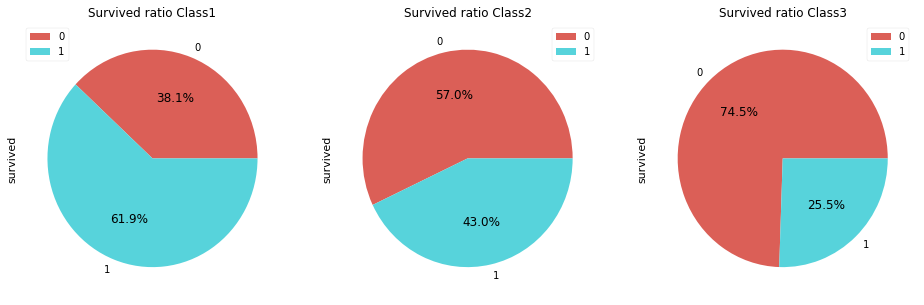

In [61]:
sns.set_palette('hls', 2)
fig, axes = plt.subplots(1, 3, figsize=(16,5))
for i, (label, df_sub) in enumerate(df.groupby('pclass')):
    df_sub['survived'].value_counts(sort=False).plot.pie(
        legend=True, ax=axes[i], title='Survived ratio Class{}'.format(label), autopct='%1.1f%%')

### 3.5 Proportion of passengers that survived by travel class and sex

Below we compute the numbers and plot an histogram that shows the survival proportion. 
The number are as relevant as before. We can see that the survival chance of a woman is much higher than the one of a man, for any class.

In [62]:
print('Probaility of surviving as a funtion of Class# and sex')
df.groupby(['pclass', 'sex']).sum()['survived'].divide(df.groupby(['pclass', 'sex'])['survived'].count())

Probaility of surviving as a funtion of Class# and sex


pclass  sex   
1       female    0.965278
        male      0.340782
2       female    0.886792
        male      0.146199
3       female    0.490741
        male      0.152130
Name: survived, dtype: float64

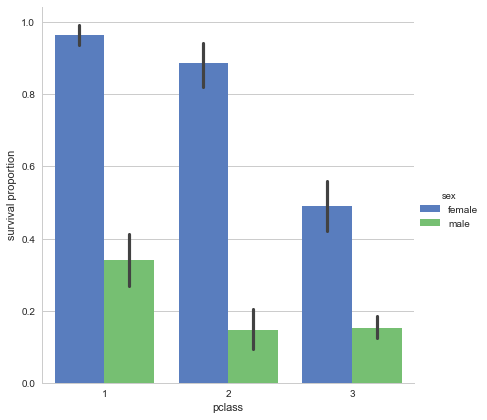

In [63]:
sns.set(style="whitegrid")
g = sns.factorplot(x="pclass", y="survived", hue="sex", data=df, size=6, kind="bar", palette="muted")
g.set_ylabels("survival proportion")

### 3.6. Several survival proportions 

We splitted the population by age using the median, in order to have two equally populated age categories. After we made the computation to observe the survival proportion by age category, travel class and gender with the result displayed in a Dataframe below.

This is a much finer way to observe the survival rate than the one used right above. We can see that as stated before, women had a higher chance to survive. We can see also that overall, younger people had better chance to survive. As observed before, the higher class a person was in, the higher its chances were to survive. Those observations allows us to confirm that the "Women and children first" rule was applied on the Titanic.

Note that there are few passenger that are 28 years old. They will therefore be part of the [0, 28] interval. It is not relevant to split thoses passenger into two equaly propotional categories since we have no precise knowledge of the age. 

In [64]:
print('# Number of people that are {}: {}'.format(df['age'].median(), np.sum(df['age']==df['age'].median())))
df.age = pd.cut(df.age, [0, df['age'].median(), df['age'].max()])
df.age.value_counts()

# Number of people that are 28.0: 32


(0.0, 28.0]     536
(28.0, 80.0]    510
Name: age, dtype: int64

In [65]:
total_per_id = df.groupby(['age', 'sex', 'pclass'])['survived'].agg(['count'])['count']
sur_rate = df.groupby(['age', 'sex', 'pclass'])['survived'].sum().divide(total_per_id)*100
sur_rate = pd.DataFrame(sur_rate)
sur_rate

0
age          sex    pclass           
(0.0, 28.0]  female 1       95.121951
                    2       91.071429
                    3       51.376147
             male   1       53.125000
                    2       21.621622
                    3       18.303571
(28.0, 80.0] female 1       96.739130
                    2       87.234043
                    3       37.209302
             male   1       30.252101
                    2        8.333333
                    3       14.400000

In [66]:
sur_rate.index.is_unique

True